In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns

In [3]:
filePath = f'planilha_final.csv'
df = pd.read_csv(filePath, sep=';', decimal=',', encoding='latin1')

# Set para indice ser a data
df['DATA'] = pd.to_datetime(df['DATA'])
df.set_index('DATA', inplace=True)
df.head()

,HORA,precipitacao_total,pressao_atmosferica,radiacao,temperatura_bulbo,temperatura_orvalho,temperatura_med,umidade,precipitacao_acumulada,deficit_umidade,precip_soma,nesterov,faixa_risco,Estacao
DATA,,,,,,,,,,,,,,
2007-01-01,16:00:00,0.0,902.3,1749.5,22.7,18.0,22.65,75.0,8.2,4.65,8.2,171.12,0,0
2007-01-02,16:00:00,0.8,902.7,2125.7,21.3,19.6,23.15,90.0,26.2,3.55,17.2,258.44,0,0
2007-01-03,16:00:00,0.0,902.0,2906.7,26.3,19.7,25.30,67.0,28.8,5.60,30.0,694.40,1,0
2007-01-04,16:00:00,0.8,899.4,2599.9,22.4,19.3,24.70,83.0,46.6,5.40,30.0,669.60,1,0
2007-01-05,16:00:00,0.2,896.2,2845.1,23.5,20.2,23.15,81.0,60.4,2.95,30.0,365.80,0,0


TEMPERATURA

In [4]:
# Calcular a média anual da temperatura
df_trend = df.temperatura_med.resample('Y').mean()

# Renomear o índice para mostrar apenas o ano
df_trend.index = df_trend.index.year

# Mostrar o resultado
print(df_trend)

DATA
2007    22.533772
2008    21.069199
2009    21.507808
2010    21.304052
2011    21.080991
2012    21.994261
2013    21.402607
2014    22.452877
2015    22.454224
2016    21.605080
2017    22.514110
2018    22.615205
2019    23.338288
2020    23.355738
Name: temperatura_med, dtype: float64


<ipython-input-4-031c6b0606df>:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_trend = df.temperatura_med.resample('Y').mean()


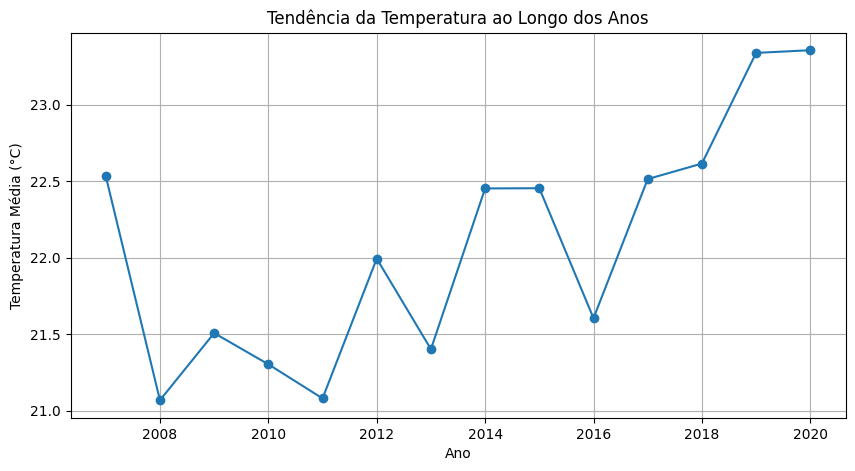

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(df_trend.index, df_trend, marker='o', linestyle='-')
plt.xlabel("Ano")
plt.ylabel("Temperatura Média (°C)")
plt.title("Tendência da Temperatura ao Longo dos Anos")
plt.grid()
plt.show()

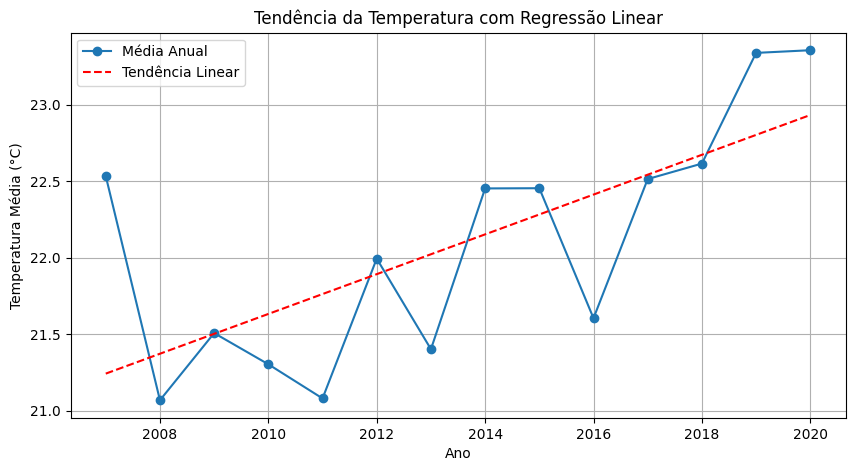

Inclinação da tendência: 0.1300 °C por ano
Coeficiente de determinação (R²): 0.4920


In [6]:
# Criar variáveis independentes e dependentes para a regressão
anos = df_trend.index.astype(int)  # Converter anos para inteiros
temperaturas = df_trend.values

# Ajustar uma regressão linear
slope, intercept, r_value, p_value, std_err = linregress(anos, temperaturas)

# Gerar a linha de tendência
trend_line = intercept + slope * anos

# Plotar o gráfico com a linha de tendência
plt.figure(figsize=(10, 5))
plt.plot(anos, temperaturas, marker='o', linestyle='-', label="Média Anual")
plt.plot(anos, trend_line, linestyle="--", color="red", label="Tendência Linear")
plt.xlabel("Ano")
plt.ylabel("Temperatura Média (°C)")
plt.title("Tendência da Temperatura com Regressão Linear")
plt.legend()
plt.grid()
plt.show()

# Exibir a inclinação da tendência
print(f"Inclinação da tendência: {slope:.4f} °C por ano")
print(f"Coeficiente de determinação (R²): {r_value**2:.4f}")

In [7]:
# Calcular a média mensal ao longo dos anos
df_sazonalidade = df['temperatura_med'].resample('M').mean()

# Criar uma média histórica para cada mês (média de janeiro, fevereiro, etc.)
df_mensal = df_sazonalidade.groupby(df_sazonalidade.index.month).mean()

# Renomear o índice para os nomes dos meses
meses = ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago", "Set", "Out", "Nov", "Dez"]
df_mensal.index = meses

<ipython-input-7-bb0fab3d4359>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_sazonalidade = df['temperatura_med'].resample('M').mean()


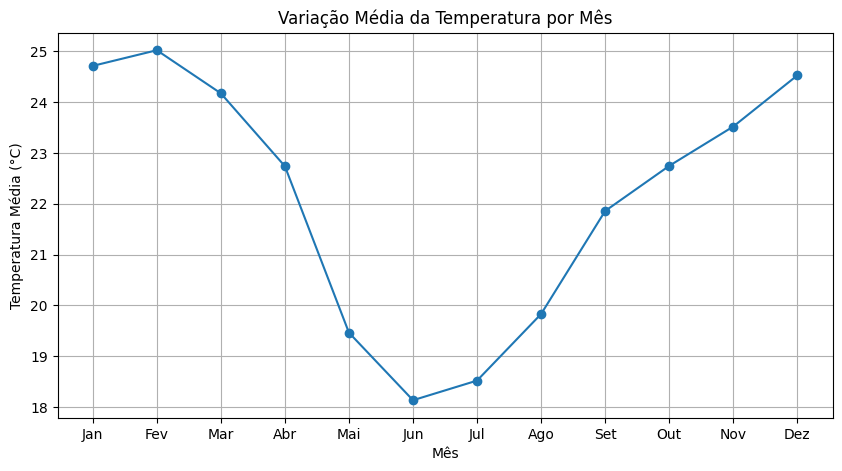

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(meses, df_mensal, marker='o', linestyle='-')
plt.xlabel("Mês")
plt.ylabel("Temperatura Média (°C)")
plt.title("Variação Média da Temperatura por Mês")
plt.grid()
plt.show()

UMIDADE

<ipython-input-9-40b02ffea56c>:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_umidade_trend = df['umidade'].resample('Y').mean()


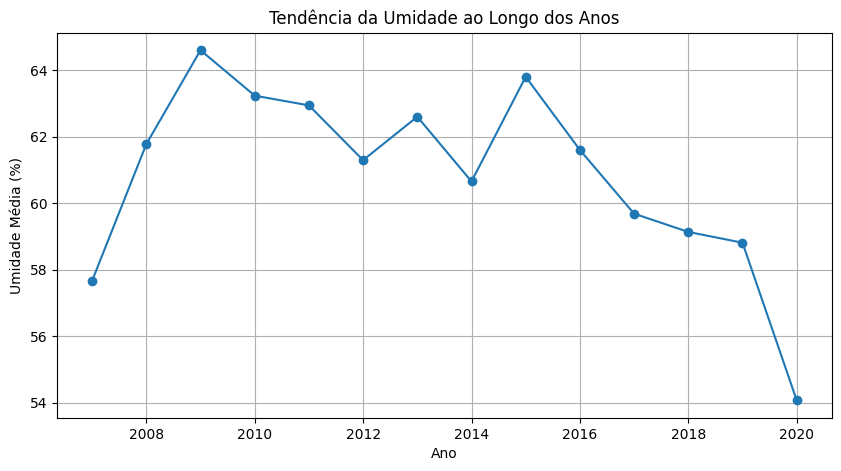

In [9]:
df_umidade_trend = df['umidade'].resample('Y').mean()

# Ajustar o índice para exibir apenas o ano
df_umidade_trend.index = df_umidade_trend.index.year

plt.figure(figsize=(10, 5))
plt.plot(df_umidade_trend.index, df_umidade_trend, marker='o', linestyle='-')
plt.xlabel("Ano")
plt.ylabel("Umidade Média (%)")
plt.title("Tendência da Umidade ao Longo dos Anos")
plt.grid()
plt.show()

<ipython-input-10-83150d901a90>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_umidade_sazonalidade = df['umidade'].resample('M').mean()


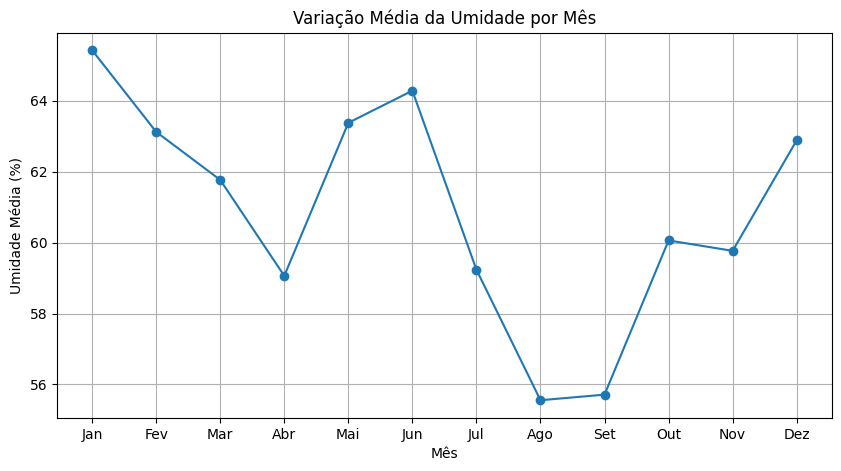

In [10]:
# Calcular a média mensal ao longo dos anos
df_umidade_sazonalidade = df['umidade'].resample('M').mean()

# Criar uma média histórica para cada mês
df_umidade_mensal = df_umidade_sazonalidade.groupby(df_umidade_sazonalidade.index.month).mean()

# Renomear os meses
df_umidade_mensal.index = meses

# Plotar a variação da umidade ao longo dos meses
plt.figure(figsize=(10, 5))
plt.plot(meses, df_umidade_mensal, marker='o', linestyle='-')
plt.xlabel("Mês")
plt.ylabel("Umidade Média (%)")
plt.title("Variação Média da Umidade por Mês")
plt.grid()
plt.show()

INDICE NESTEROV

In [11]:
# Calcular a média mensal ao longo dos anos
df_nesterov_sazonalidade = df['nesterov'].resample('M').mean()

# Criar uma média histórica para cada mês (média de janeiro, fevereiro, etc.)
df_mensal = df_nesterov_sazonalidade.groupby(df_nesterov_sazonalidade.index.month).mean()

# Renomear o índice para os nomes dos meses
df_mensal.index = meses

<ipython-input-11-2ccf163e9ca7>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_nesterov_sazonalidade = df['nesterov'].resample('M').mean()


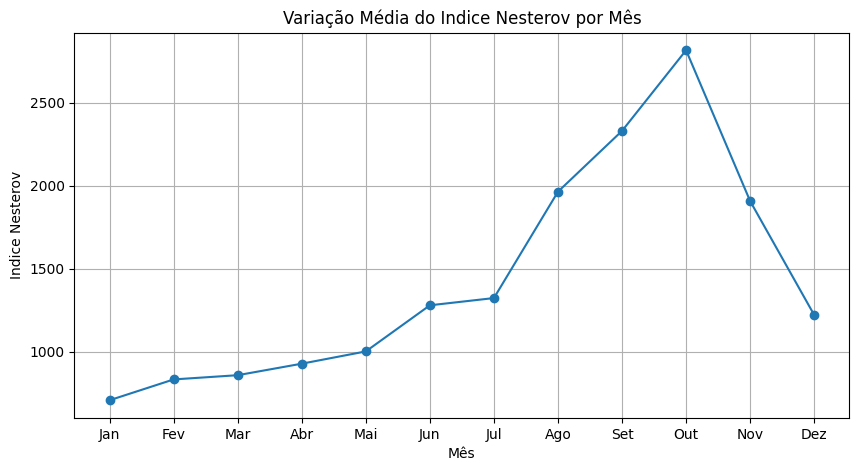

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(meses, df_mensal, marker='o', linestyle='-')
plt.xlabel("Mês")
plt.ylabel("Indice Nesterov")
plt.title("Variação Média do Indice Nesterov por Mês")
plt.grid()
plt.show()

In [13]:
# Selecionando os 100 maiores valores
df_trend_nesterov = df[['nesterov']].nlargest(200, 'nesterov')  # Mantém como DataFrame

# Criando a coluna "Mês" sem diferenciar o ano
df_trend_nesterov['mes'] = df_trend_nesterov.index.month  # Pega apenas o mês

# Agrupando os valores por mês (contagem de ocorrências)
agrupado_por_mes = df_trend_nesterov.groupby('mes')['nesterov'].count()

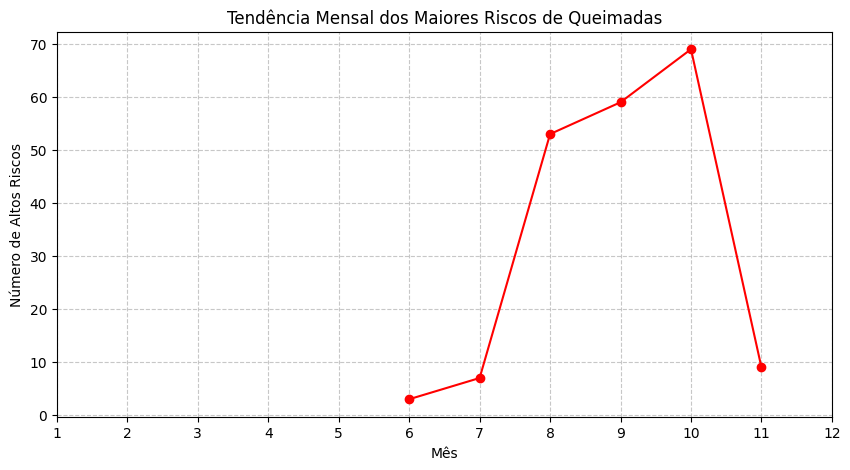

In [14]:
# Criando gráfico de linha
plt.figure(figsize=(10, 5))
plt.plot(agrupado_por_mes.index, agrupado_por_mes.values, marker='o', linestyle='-', color='r')
plt.xlabel("Mês")
plt.ylabel("Número de Altos Riscos")
plt.title("Tendência Mensal dos Maiores Riscos de Queimadas")
plt.xticks(range(1, 13))
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

📊 Estatísticas do Índice de Nesterov:
count     5114.000000
mean      1432.964600
std       1511.065144
min          0.000000
25%        362.137500
50%        985.800000
75%       1894.875000
max      10177.300000
Name: nesterov, dtype: float64


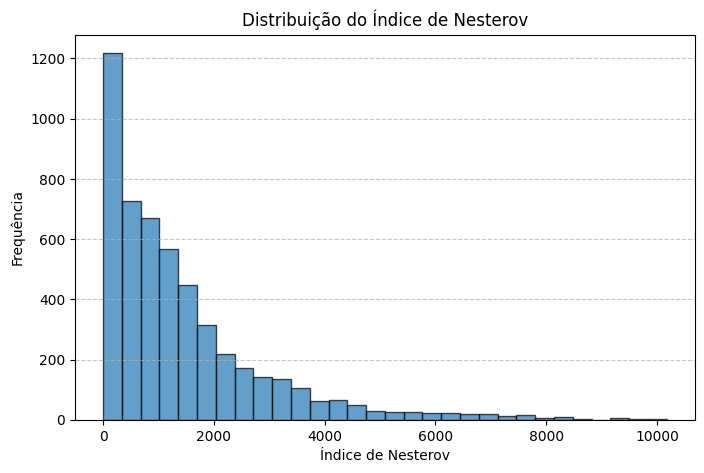

In [15]:
# Estatísticas descritivas do índice de Nesterov
nesterov_stats = df["nesterov"].describe()

# Exibir estatísticas descritivas
print("📊 Estatísticas do Índice de Nesterov:")
print(nesterov_stats)

# Criar histograma
plt.figure(figsize=(8,5))
plt.hist(df["nesterov"], bins=30, edgecolor="black", alpha=0.7)
plt.xlabel("Índice de Nesterov")
plt.ylabel("Frequência")
plt.title("Distribuição do Índice de Nesterov")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()